# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [12]:
import math
import sys

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [15]:
# YOUR CODE HERE

#Note: I am using VSCode to complete the project and uploading the csv to complete it.

wine = pd.read_csv("wine_quality_red.tsv", sep="\t")
wine = wine.dropna()
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
957,9.5,0.37,0.52,2.0,0.088,12.0,51.0,0.99613,3.29,0.58,11.1,6
457,9.2,0.63,0.21,2.7,0.097,29.0,65.0,0.99880,3.28,0.58,9.6,5
662,7.2,0.57,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6,6
70,7.7,0.63,0.08,1.9,0.076,15.0,27.0,0.99670,3.32,0.54,9.5,6
86,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
1129,10.5,0.43,0.35,3.3,0.092,24.0,70.0,0.99798,3.21,0.69,10.5,6
1151,6.1,0.58,0.23,2.5,0.044,16.0,70.0,0.99352,3.46,0.65,12.5,6
1218,8.2,0.40,0.31,1.9,0.082,8.0,24.0,0.99600,3.24,0.69,10.6,6
801,8.6,0.55,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0,5
861,5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.60,11.5,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [ ]:
# YOUR CODE HERE

"""
"fixed acidity": Measures the concentration of stable acids. Higher values indicate more acidity. Can be used as a predictor of wine taste (sourness).

"volatile acidity": Measures acids that can vaporize. Higher values are associated with spoilage. Important for predicting low-quality wines.

"citric acid": Amount of citric acid in the wine. Small numeric values; can affect freshness.

"residual sugar": Sugar remaining after fermentation. Higher values indicate sweeter wines.

"chlorides": Salt content. Usually very small numeric values; high chloride can indicate poor taste.

"free sulfur dioxide": Free SO₂ in mg/L, protects wine from microbes.

"total sulfur dioxide": Total SO₂ (free + bound). Can be predictive of stability or spoilage.

"density": Mass per unit volume. Higher density often correlates with higher sugar content.

"pH": Wine acidity on a logarithmic scale. Lower pH = more acidic.

"sulphates": Added sulfur compounds. Can influence stability and taste.

"alcohol": Ethanol content. Higher alcohol often increases body and flavor intensity.

"target": Wine quality score from tasters. Target variable for modeling.
"""

wine.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [ ]:
# YOUR CODE HERE
"""
describe(): gives us the min, max, mean, std, quartiles of the dataset — useful for spotting outliers and data ranges

isnull().sum(): confirms there's any missing data, good to check and examine the null values in case they are important to the dataset before dropping them

Correlations (corr()): shows linear relationships between features, strong correlations can suggest which variables might be predictive of quality

"""

print("Descriptive statistics:\n")
print(wine.describe())

print("\nMissing values per column:\n")
print(wine.isnull().sum())

corr_matrix = wine.corr()
print("\nCorrelation matrix:\n")
print(corr_matrix)


Descriptive statistics:

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000     

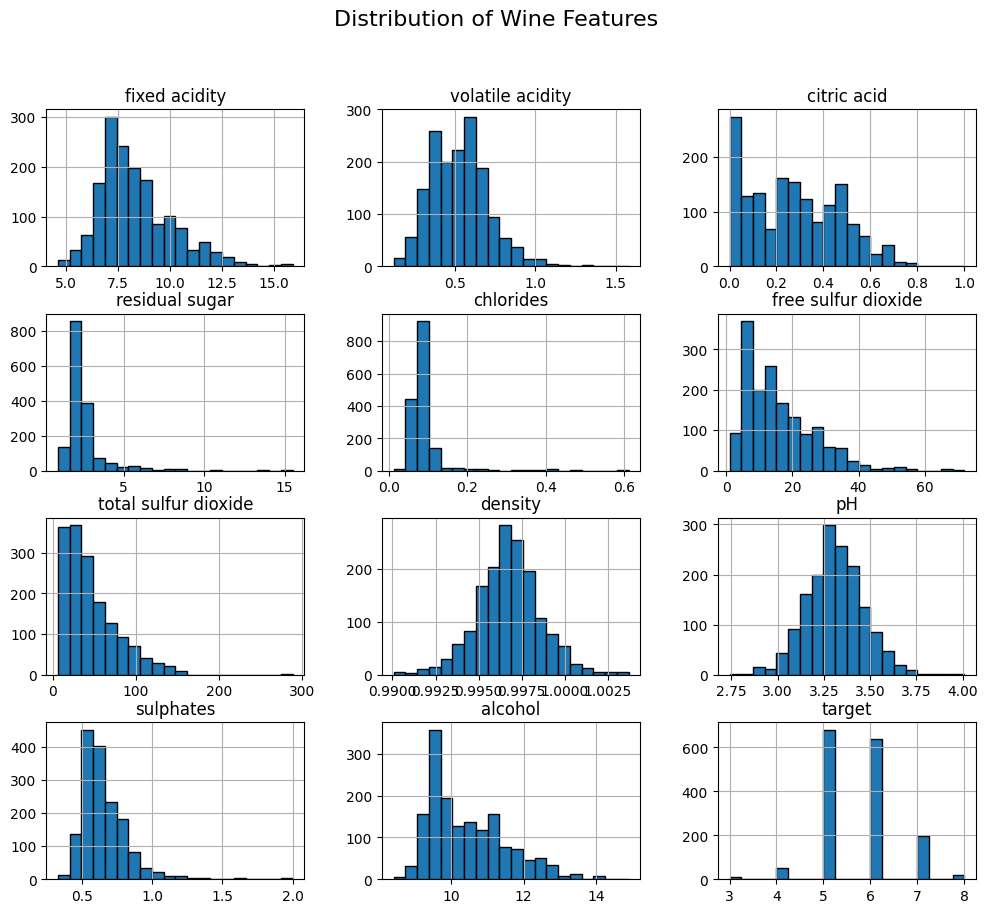

In [ ]:
"""
Histograms show skewness and spread.
For example, residual sugar is skewed right b/c most wines have low sugar.
alcohol and density appear roughly normally distributed.
"""

wine.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Wine Features", fontsize=16)
plt.show()

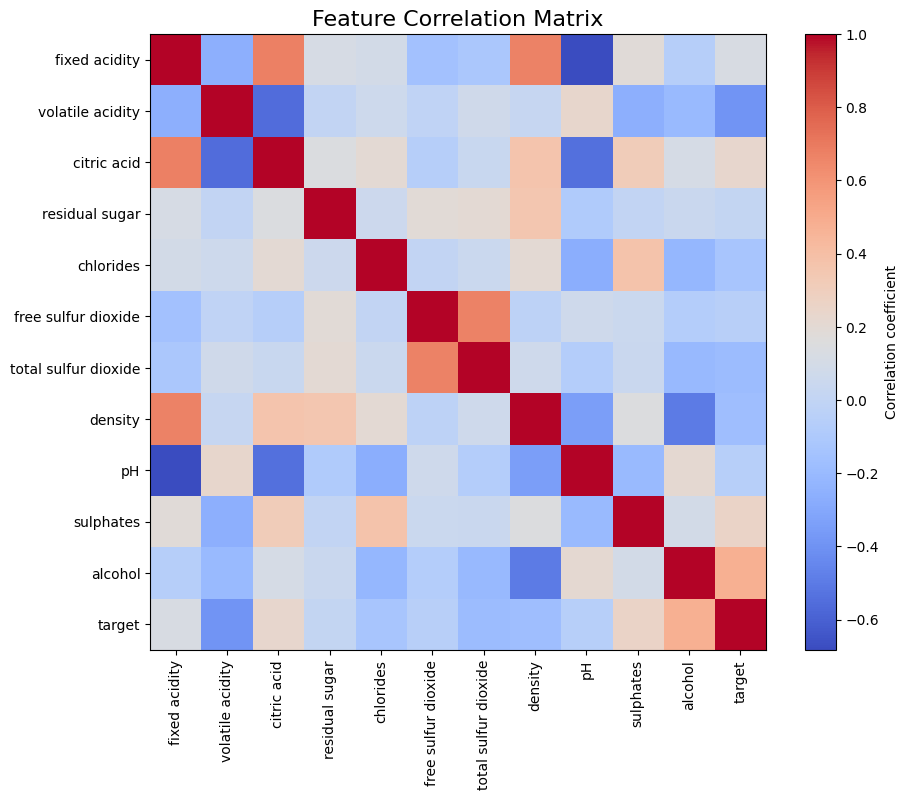

In [ ]:
"""
Strong positive correlation between density and residual sugar.
alcohol is negatively correlated with density — higher alcohol usually means lower density.
Moderate correlations with quality suggest which features may be predictive.
"""

plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.show()


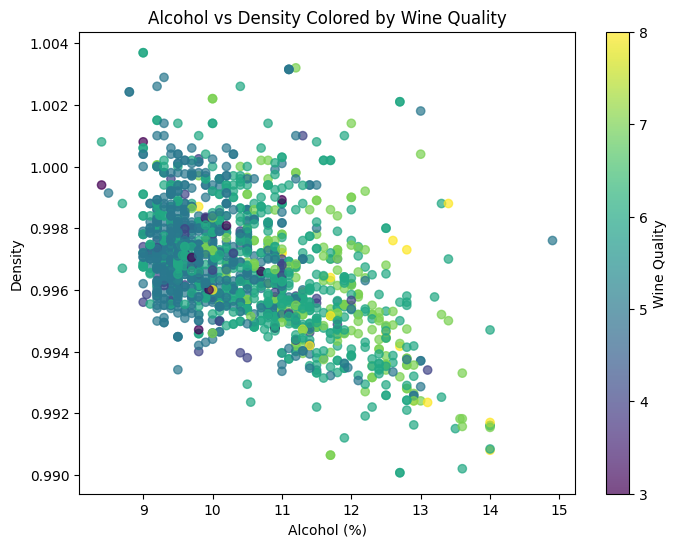

In [ ]:
"""
Negative relationship between alcohol and density.
High-quality wines cluster at high alcohol and low density.
Confirms patterns seen in the correlation matrix.
"""

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    wine['alcohol'], 
    wine['density'], 
    c=wine['target'], 
    cmap='viridis', 
    alpha=0.7
)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Alcohol (%)')
plt.ylabel('Density')
plt.title('Alcohol vs Density Colored by Wine Quality')
plt.show()


YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

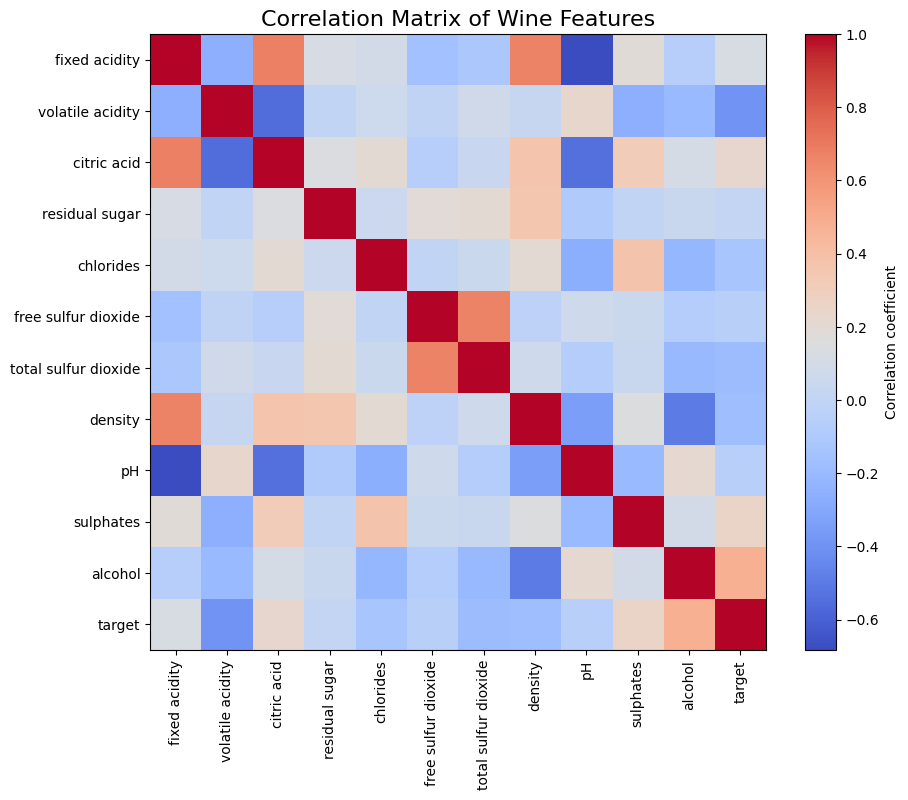

In [34]:
# YOUR CODE HERE

corr_matrix = wine.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix of Wine Features", fontsize=16)
plt.show()


In [ ]:
"""
The heatmap visually shows which features are strongly positively (red) or negatively (blue) correlated.
By masking the diagonal, we exclude each column's correlation with itself.
The output tells you the two different columns with the strongest correlation.
"""
masked_corr = corr_matrix.copy()
np.fill_diagonal(masked_corr.values, 0)

max_corr = masked_corr.abs().max().max()  # absolute value
max_pair = np.where(masked_corr.abs() == max_corr)

col1 = corr_matrix.columns[max_pair[0][0]]
col2 = corr_matrix.columns[max_pair[1][0]]

print(f"The most correlated pair of different columns is: '{col1}' and '{col2}' with correlation {masked_corr.loc[col1, col2]:.2f}")


The most correlated pair of different columns is: 'fixed acidity' and 'pH' with correlation -0.68


YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE

"""
Model Class 1: LinearRegression (Ordinary Least Squares)
scikit-learn docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
addtitional: https://en.wikipedia.org/wiki/Linear_regression?utm_source=chatgpt.com
Why?: This is the simplest baseline. It gives a clear linear model of how features relate to the target, and is easy to interpret.


Model Class 2: Ridge (L2-Regularized Linear Regression)
scikit-learn docs: https://sklearn.org/stable/api/sklearn.linear_model.html?utm_source=chatgpt.com
additional: https://sklearn.org/stable/auto_examples/linear_model/plot_ols_ridge.html?utm_source=chatgpt.com
Why?: Because the dataset has many numeric features that could be correlated, a penalized linear model like Ridge can stabilize coefficient estimates and improve predictive performance 
compared to ordinary linear regression.


Model Class 3: RandomForestRegressor (Tree-based Ensemble Regression)
scikit-learn docs: https://scikit-learn.org/1.3/modules/classes.html?utm_source=chatgpt.com 
additional: https://en.wikipedia.org/wiki/Random_forest?utm_source=chatgpt.com
Why?: It captures non-linear relationships and feature interactions that linear models miss.
It is useful if wine quality depends on complex, non-linear combinations of chemical features.
"""

'\nModel Class 1: LinearRegression (Ordinary Least Squares)\nscikit-learn docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html\naddtitional: https://en.wikipedia.org/wiki/Linear_regression?utm_source=chatgpt.com\nWhy?: This is the simplest baseline. It gives a clear linear model of how features relate to the target, and is easy to interpret.\n\n\nModel Class 2: Ridge (L2-Regularized Linear Regression)\nscikit-learn docs: https://sklearn.org/stable/api/sklearn.linear_model.html?utm_source=chatgpt.com\nadditional: https://sklearn.org/stable/auto_examples/linear_model/plot_ols_ridge.html?utm_source=chatgpt.com\nWhy?: Because the dataset has many numeric features that could be correlated, a penalized linear model like Ridge can stabilize coefficient estimates and improve predictive performance \ncompared to ordinary linear regression.\n\n\nModel Class 3: RandomForestRegressor (Tree-based Ensemble Regression)\nscikit-learn docs: https://scikit-l

YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [ ]:
# YOUR CODE HERE

# Features and target
X = wine_clean.drop(columns='target')
y = wine_clean['target']


YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE